<a href="https://www.kaggle.com/code/aayushsin7a/cirrhosis-patient-survival-prediction?scriptVersionId=162652682" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

> ## Cirrhosis 
is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. Each time your liver is injured, it tries to repair itself. In the process, scar tissue forms. As the cirrhosis progresses, more and more scar tissue forms, making it difficult for the liver to function (decompensated cirrhosis). Advanced cirrhosis is life-threatening.

> # Import the required libraries


In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
import re
import calendar
# Set display options to show all columns
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)
# Ignore all warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from scipy.stats import randint, uniform

from lazypredict.Supervised import LazyClassifier, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold


/kaggle/input/cirrhosis-patient-survival-data-dictionary/bank-marketing-classification.ipynb
/kaggle/input/cirrhosis-patient-survival-data-dictionary/scania-aps-failure-prediction.ipynb
/kaggle/input/cirrhosis-patient-survival-data-dictionary/nyc-taxi-fare-prediction.ipynb
/kaggle/input/cirrhosis-patient-survival-data-dictionary/Cirrhosis Prediction.xlsx
/kaggle/input/cirrhosis-patient-survival-dd/bank-marketing-classification.ipynb
/kaggle/input/cirrhosis-patient-survival-dd/scania-aps-failure-prediction.ipynb
/kaggle/input/cirrhosis-patient-survival-dd/nyc-taxi-fare-prediction.ipynb
/kaggle/input/cirrhosis-patient-survival-dd/Cirrhosis Prediction.xlsx
/kaggle/input/cirrhosis-patient-survival-data-description/Cirrhosis Prediction.xlsx
/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv
/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [3]:
#dataDictionary = pd.read_excel("/kaggle/input/cirrhosis-patient-survival-data-dictionary/Cirrhosis Prediction.xlsx")

In [4]:
#dataDictionary.head(5)

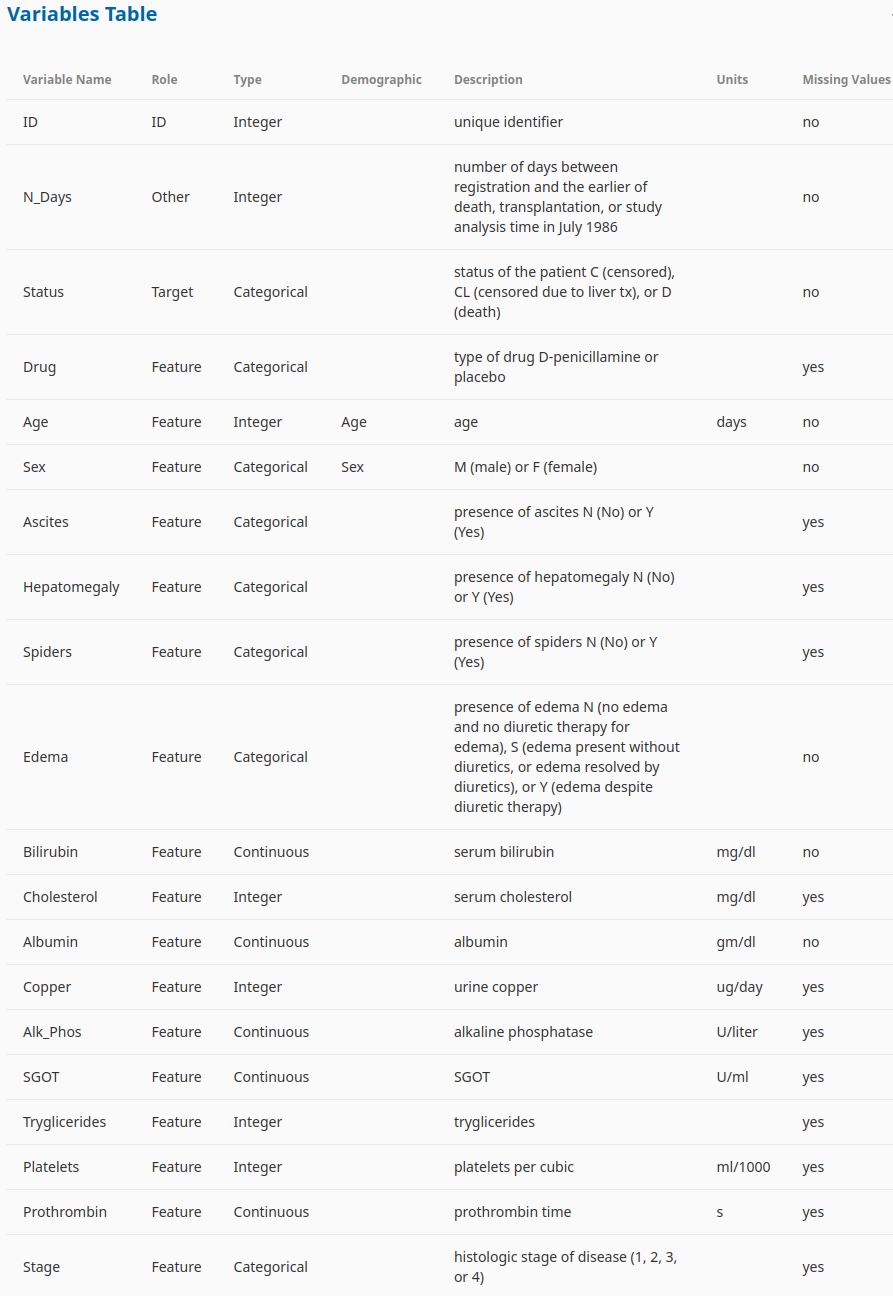

# Read the dataset

In [5]:
df_train = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
ss = pd.read_csv("/kaggle/input/playground-series-s3e26/sample_submission.csv")

# Exploratory Data Analysis

In [6]:
ss.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.63,0.03,0.34
1,7906,0.63,0.03,0.34
2,7907,0.63,0.03,0.34
3,7908,0.63,0.03,0.34
4,7909,0.63,0.03,0.34


In [7]:
# Diagnose the dataframe

In [8]:
def diagnose_dataframe(df, verbose=True):
    """
    Performs various initial inspections on a pandas dataframe and provides details.

    Args:
      df: The pandas dataframe to diagnose.
      verbose: Whether to print details for each inspection.

    Returns:
      A dictionary containing the results of the inspections.
    """

    results = {}

    # Basic information
    results["shape"] = df.shape
    results["columns"] = list(df.columns)
    results["dtypes"] = df.dtypes.to_dict()

    # Check for disparities between dtypes and actual values
    dtypes_disparities = {}
    for col in df.columns:
        unique_values = df[col].unique()
        dtype = df[col].dtype
        unique_types = set(type(value).__name__ for value in unique_values)
        if len(unique_types) > 1:
            dtypes_disparities[col] = {"dtype": dtype, "unique_types": list(unique_types)}

    results["dtypes_disparities"] = dtypes_disparities

    # Unique values and counts
    for col in df.columns:
        results[f"unique_values_{col}"] = df[col].unique()

    if verbose:
        for key, value in results.items():
            print(f"\n{key}:\n{value}")

    return results

In [9]:
diagnose_dataframe(df_train)


shape:
(7905, 20)

columns:
['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']

dtypes:
{'id': dtype('int64'), 'N_Days': dtype('int64'), 'Drug': dtype('O'), 'Age': dtype('int64'), 'Sex': dtype('O'), 'Ascites': dtype('O'), 'Hepatomegaly': dtype('O'), 'Spiders': dtype('O'), 'Edema': dtype('O'), 'Bilirubin': dtype('float64'), 'Cholesterol': dtype('float64'), 'Albumin': dtype('float64'), 'Copper': dtype('float64'), 'Alk_Phos': dtype('float64'), 'SGOT': dtype('float64'), 'Tryglicerides': dtype('float64'), 'Platelets': dtype('float64'), 'Prothrombin': dtype('float64'), 'Stage': dtype('float64'), 'Status': dtype('O')}

dtypes_disparities:
{}

unique_values_id:
[   0    1    2 ... 7902 7903 7904]

unique_values_N_Days:
[ 999 2574 3428 2576  788  703 1300 1615 2050 2615 3581 1614 1847 1153
  904 1212 1967 1592 1481 3358 3092  32

{'shape': (7905, 20),
 'columns': ['id',
  'N_Days',
  'Drug',
  'Age',
  'Sex',
  'Ascites',
  'Hepatomegaly',
  'Spiders',
  'Edema',
  'Bilirubin',
  'Cholesterol',
  'Albumin',
  'Copper',
  'Alk_Phos',
  'SGOT',
  'Tryglicerides',
  'Platelets',
  'Prothrombin',
  'Stage',
  'Status'],
 'dtypes': {'id': dtype('int64'),
  'N_Days': dtype('int64'),
  'Drug': dtype('O'),
  'Age': dtype('int64'),
  'Sex': dtype('O'),
  'Ascites': dtype('O'),
  'Hepatomegaly': dtype('O'),
  'Spiders': dtype('O'),
  'Edema': dtype('O'),
  'Bilirubin': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'Albumin': dtype('float64'),
  'Copper': dtype('float64'),
  'Alk_Phos': dtype('float64'),
  'SGOT': dtype('float64'),
  'Tryglicerides': dtype('float64'),
  'Platelets': dtype('float64'),
  'Prothrombin': dtype('float64'),
  'Stage': dtype('float64'),
  'Status': dtype('O')},
 'dtypes_disparities': {},
 'unique_values_id': array([   0,    1,    2, ..., 7902, 7903, 7904]),
 'unique_values_N_Days': arra

In [10]:
df_train.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [11]:
# Non-null count and data types of the training and test set

df_train.info()
print('-'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [12]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00
mean,3952.00,2030.17,18373.15,2.59,350.56,3.55,83.90,1816.75,114.60,115.34,265.23,10.63,3.03
std,2282.12,1094.23,3679.96,3.81,195.38,0.35,75.90,1903.75,48.79,52.53,87.47,0.78,0.87
min,0.00,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1976.00,1230.00,15574.00,0.70,248.00,3.35,39.00,834.00,75.95,84.00,211.00,10.00,2.00
50%,3952.00,1831.00,18713.00,1.10,298.00,3.58,63.00,1181.00,108.50,104.00,265.00,10.60,3.00
75%,5928.00,2689.00,20684.00,3.00,390.00,3.77,102.00,1857.00,137.95,139.00,316.00,11.00,4.00
max,7904.00,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,563.00,18.00,4.00


In [13]:
df_train.describe(include='O')

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
count,7905,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3,3
top,Placebo,F,N,Y,N,N,C
freq,4010,7336,7525,4042,5966,7161,4965


> Categorical Features

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')
Value counts of Drug : 
Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64



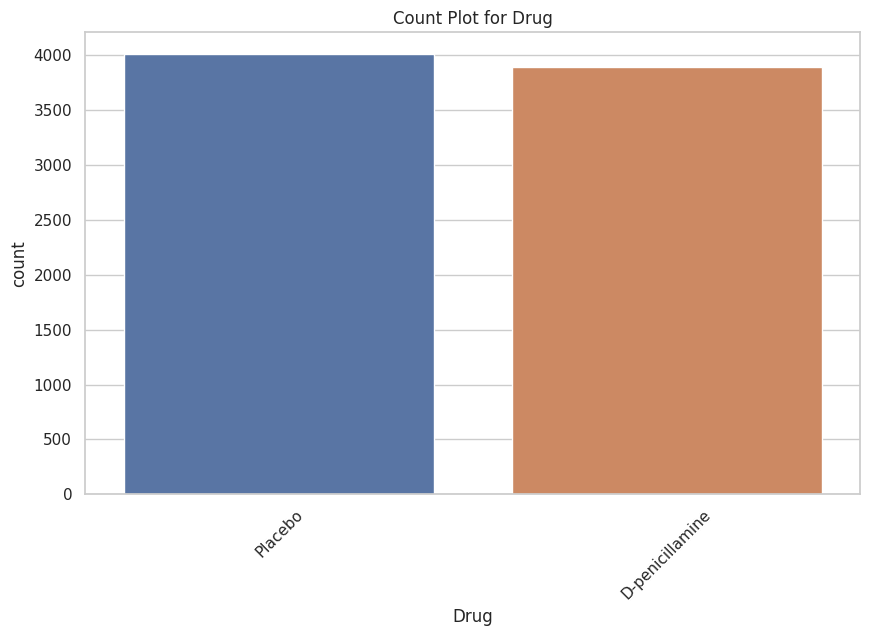

Value counts of Sex : 
Sex
F    7336
M     569
Name: count, dtype: int64



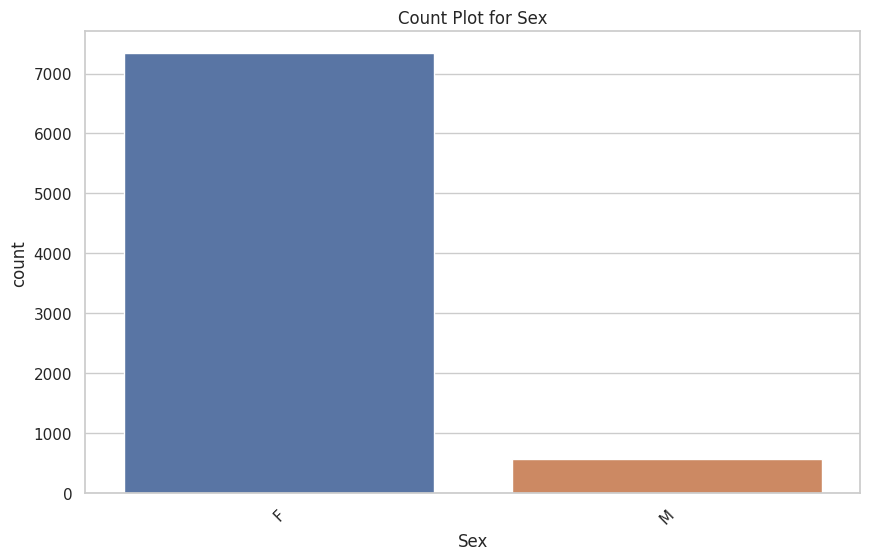

Value counts of Ascites : 
Ascites
N    7525
Y     380
Name: count, dtype: int64



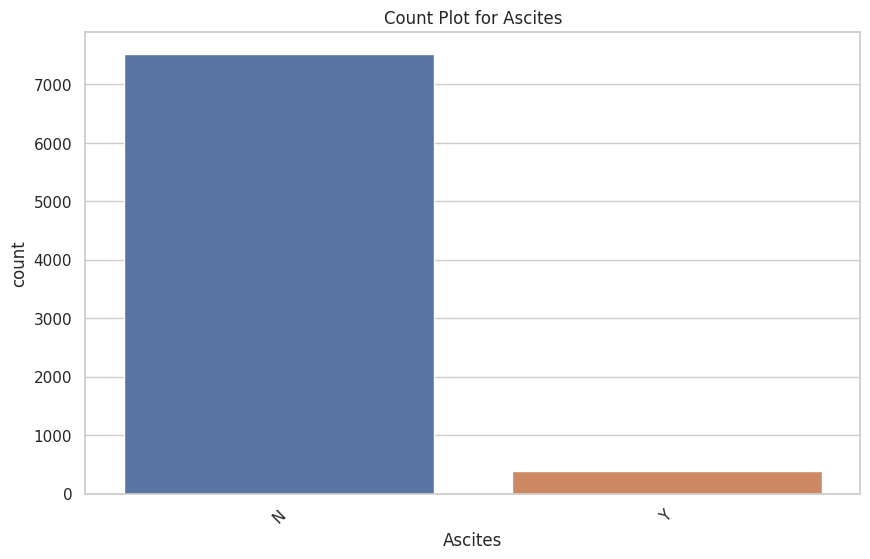

Value counts of Hepatomegaly : 
Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64



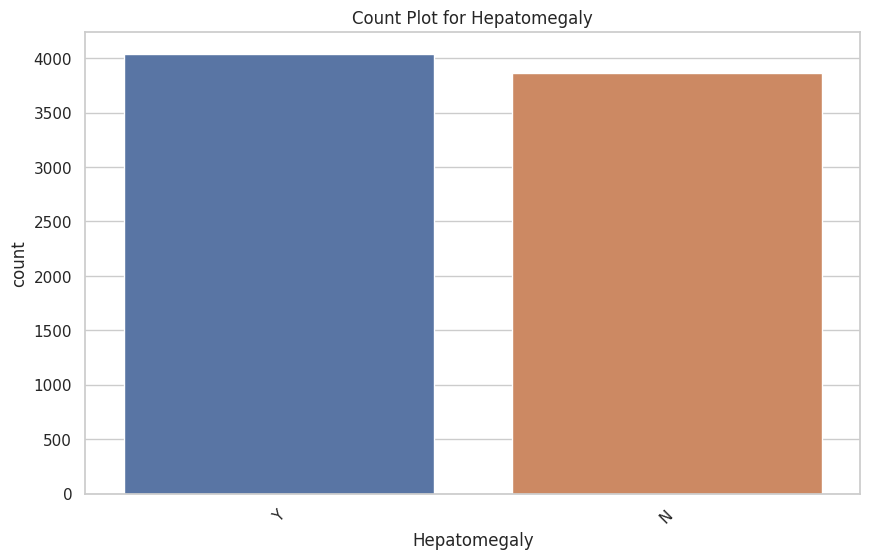

Value counts of Spiders : 
Spiders
N    5966
Y    1939
Name: count, dtype: int64



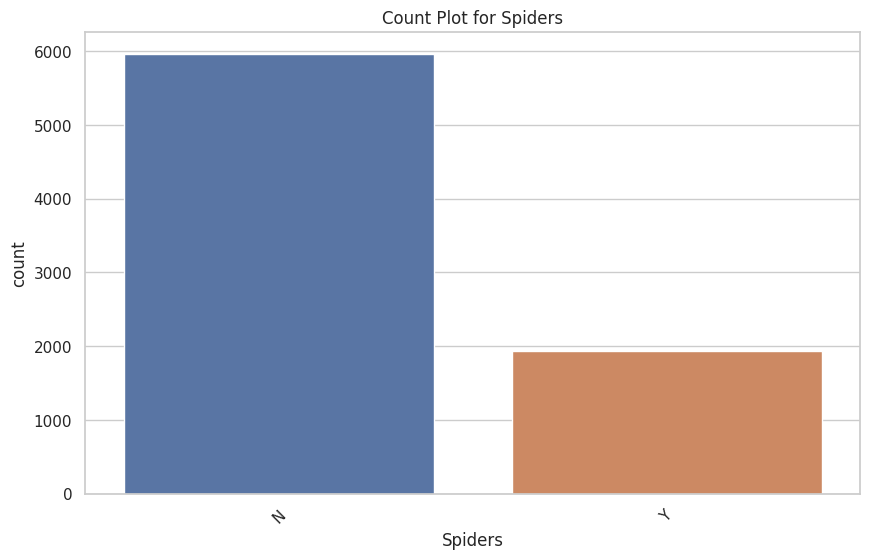

Value counts of Edema : 
Edema
N    7161
S     399
Y     345
Name: count, dtype: int64



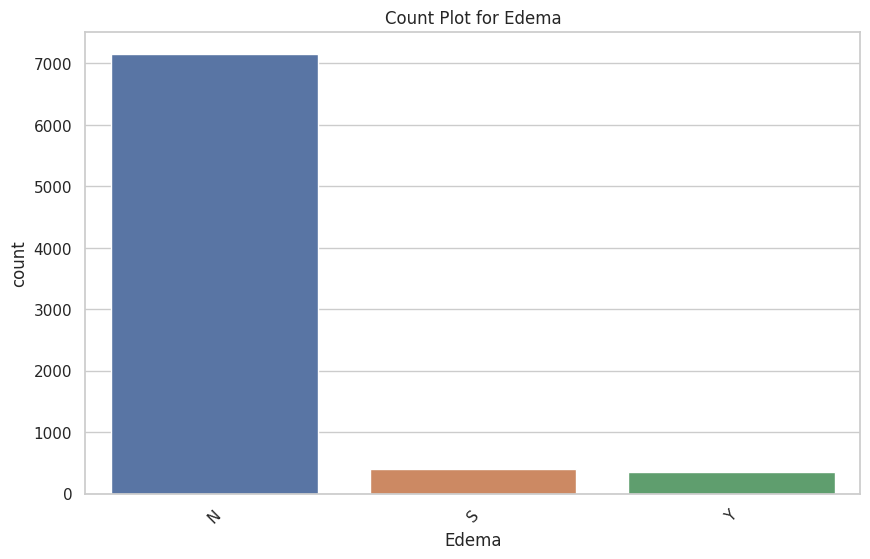

Value counts of Status : 
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64



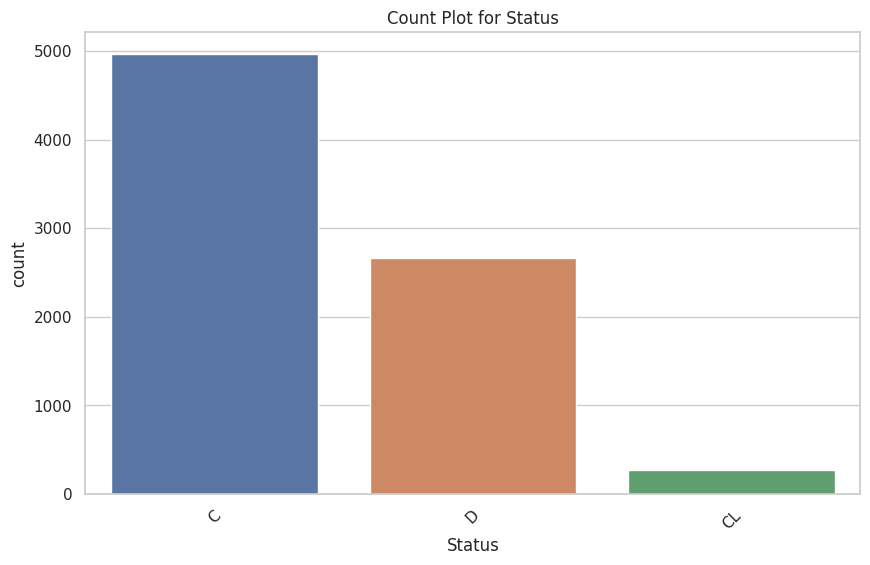

In [14]:
# Extract categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
print(categorical_columns)


# Loop through categorical columns 
for column in categorical_columns:
  print(f"Value counts of {column} : \n{df_train[column].value_counts()}\n")
  # Plot count plot
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=df_train, order=df_train[column].value_counts().index)
  plt.title(f'Count Plot for {column}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_numerical_columns(df):
    """
    Analyzes all numerical columns in the dataframe and prints their basic statistics.

    Args:
        df: The pandas dataframe.
    """
    # Filter numerical columns
    numerical_columns = df.select_dtypes(include=np.number).columns
    
    # Loop through numerical columns
    for column in numerical_columns:
        # Calculate basic statistics
        stats = df[column].describe(percentiles=[0.25, 0.5, 0.75])

        # Check for outliers using interquartile range (IQR) method
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        outlier_threshold = 1.5 * iqr
        outliers = df[(df[column] < (q1 - outlier_threshold)) | (df[column] > (q3 + outlier_threshold))]
        outlier_count = len(outliers)

        # Print statistics
        print(f"\nAnalysis of '{column}':")
        print("-" * 30)
        print(stats)
        print(f"\nNumber of outliers: {outlier_count}")

def plot_numerical_column(df, column):
    """
    Plots a histogram and a box plot for a numerical column.

    Args:
        df: The pandas dataframe.
        column: The name of the numerical column.
    """
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot histogram
    sns.histplot(df[column], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogram of '{column}'")

    # Plot box plot
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f"Box plot of '{column}'")

    # Adjust layout
    plt.tight_layout()
    plt.show()

def analyze_and_plot_numerical_columns(df):
    """
    Analyzes and plots all numerical columns in the dataframe.

    Args:
        df: The pandas dataframe.
    """
    # Filter numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # Loop through numerical columns
    for column in numerical_columns:
        analyze_numerical_column(df, column)
        plot_numerical_column(df, column)


In [16]:
analyze_numerical_columns(df_train)



Analysis of 'id':
------------------------------
count   7905.00
mean    3952.00
std     2282.12
min        0.00
25%     1976.00
50%     3952.00
75%     5928.00
max     7904.00
Name: id, dtype: float64

Number of outliers: 0

Analysis of 'N_Days':
------------------------------
count   7905.00
mean    2030.17
std     1094.23
min       41.00
25%     1230.00
50%     1831.00
75%     2689.00
max     4795.00
Name: N_Days, dtype: float64

Number of outliers: 0

Analysis of 'Age':
------------------------------
count    7905.00
mean    18373.15
std      3679.96
min      9598.00
25%     15574.00
50%     18713.00
75%     20684.00
max     28650.00
Name: Age, dtype: float64

Number of outliers: 36

Analysis of 'Bilirubin':
------------------------------
count   7905.00
mean       2.59
std        3.81
min        0.30
25%        0.70
50%        1.10
75%        3.00
max       28.00
Name: Bilirubin, dtype: float64

Number of outliers: 789

Analysis of 'Cholesterol':
------------------------------
co

> ## Outlier Analyisis

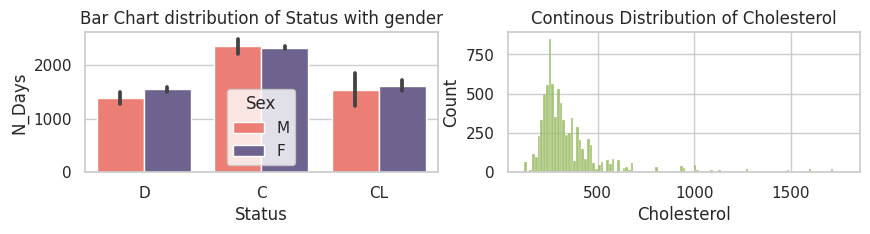

In [17]:
custom_palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"]

plt.figure(figsize=(10, 10))

plt.subplot(4, 2, 1)
sns.barplot(data=df_train, x='Status', y='N_Days', hue='Sex', palette=custom_palette)
plt.title('Bar Chart distribution of Status with gender')

plt.subplot(4, 2, 2)
sns.histplot(df_train['Cholesterol'], color=custom_palette[2])  # Using a color from the palette
plt.title('Continous Distribution of Cholesterol')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
numeric = df_train.select_dtypes(include=['int64','float64'])

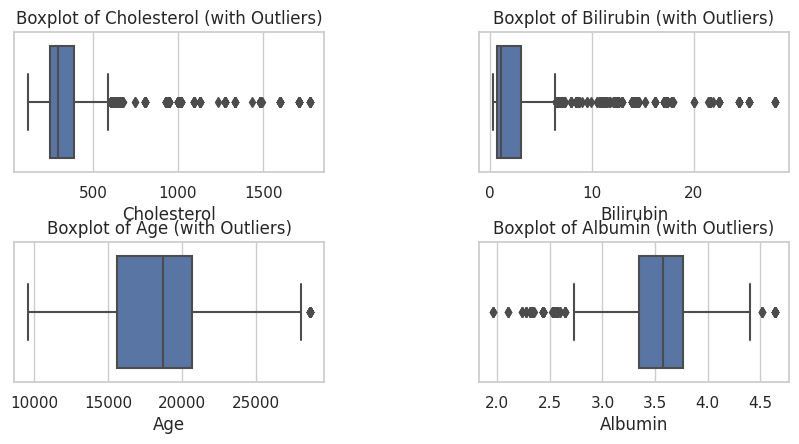

In [19]:
plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.boxplot(x='Cholesterol', data=df_train, showfliers=True)
plt.title('Boxplot of Cholesterol (with Outliers)')

plt.subplot(4,2,2)
sns.boxplot(x='Bilirubin', data=df_train, showfliers=True)
plt.title('Boxplot of Bilirubin (with Outliers)')

plt.subplot(4,2,3)
sns.boxplot(x='Age', data=df_train, showfliers=True)
plt.title('Boxplot of Age (with Outliers)')

plt.subplot(4,2,4)
sns.boxplot(x='Albumin', data=df_train, showfliers=True)
plt.title('Boxplot of Albumin (with Outliers)')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [20]:


def outlier_detection(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[feature] = np.where(df[feature] < lower_bound, Q1, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, Q3, df[feature])



In [21]:
features_containing_outliers = [
    'Bilirubin', 'Cholesterol', 'Albumin',
    'Tryglicerides', 'Platelets', 'Prothrombin',
    'Copper', 'Alk_Phos','SGOT'                           
]

for feature in features_containing_outliers:
    outlier_detection(df_train, feature)
    outlier_detection(df_test, feature)


# Feature Engineering 

In [22]:
def get_features(df, feature_scaling=False):
    # Coagulation
    df['Coagulation'] = df['N_Days'] * (df['Platelets'] / (df['Prothrombin'] + 1e-9))  # Adding small value to avoid division by zero

    # Lipids
    df['Lipids'] = df['N_Days'] * (df['Cholesterol'] / (df['Tryglicerides'] + 1e-9))  # Adding small value to avoid division by zero

    # Liver
    df['Liver'] = ((df['Alk_Phos'] / (df['Prothrombin'] + 1e-9)) * (df['Albumin'] / (df['Bilirubin'] + 1e-9)))  # Adding small value to avoid division by zero

    # Blood Pressure
    df['BloodPressure'] = (df['Liver'] * df['Albumin'] * df['Prothrombin']) / (df['Platelets'] + 1e-9)  # Adding small value to avoid division by zero

    # Fats
    df['Fats'] = df['Lipids'] / (df['Tryglicerides'] + 1e-9)  # Adding small value to avoid division by zero

    # Foods
    df['Foods'] = df['Liver'] / (df['Cholesterol'] + 1e-9)  # Adding small value to avoid division by zero
    
    # Age in Years
    df['Age_in_years'] = df['Age']/365.0
    
    # Drop Age
    df.drop(columns=['Age'],axis=1,inplace = True)
    
    # Combination Features
    df['combination1'] = ((df['Albumin'] / (df['Bilirubin'] + 1e-9)) * (df['Platelets'] / (df['Alk_Phos'] + 1e-9)) * df['SGOT'] * df['Prothrombin'])
    df['combination2'] = ((df['Albumin'] / (df['Prothrombin'] + 1e-9)) * (df['SGOT'] / (df['Alk_Phos'] + 1e-9)) * df['Platelets'] * df['Bilirubin'])
    df['combination3'] = ((df['Cholesterol'] / (df['Copper'] + 1e-9)) * df['Tryglicerides'])  # Adding small value to avoid division by zer
    
    return df


In [23]:
get_features(df_train)

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Coagulation,Lipids,Liver,BloodPressure,Fats,Foods,Age_in_years,combination1,combination2,combination3
0,0,999,D-penicillamine,M,N,N,N,N,2.30,316.00,3.35,172.00,1601.00,179.80,63.00,394.00,9.70,3.00,D,40577.94,5010.86,240.40,19.83,79.54,0.76,58.99,625.15,35.15,115.74
1,1,2574,Placebo,F,N,N,N,N,0.90,364.00,3.54,63.00,1440.00,134.85,88.00,361.00,11.00,3.00,C,84474.00,10647.00,514.91,55.54,120.99,1.41,52.70,1462.68,9.79,508.44
2,2,3428,Placebo,F,N,Y,Y,Y,3.30,299.00,3.55,131.00,1029.00,119.35,50.00,199.00,11.70,4.00,D,58305.30,20499.44,94.61,19.75,409.99,0.32,37.61,290.51,23.11,114.12
3,3,2576,Placebo,F,N,N,N,N,0.60,256.00,3.50,58.00,1653.00,71.30,96.00,269.00,10.70,3.00,C,64761.12,6869.33,901.17,125.46,71.56,3.52,50.58,724.22,2.28,423.72
4,4,788,Placebo,F,N,Y,N,N,1.10,346.00,3.65,63.00,1181.00,125.55,96.00,298.00,10.60,4.00,C,22153.21,2840.08,369.70,48.00,29.58,1.07,45.64,1114.27,12.00,527.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,F,N,N,N,N,0.80,309.00,3.56,38.00,1629.00,79.05,139.00,344.00,9.90,2.00,C,40515.56,2592.04,732.23,75.02,18.65,2.37,46.13,735.42,4.80,1130.29
7901,7901,1492,Placebo,F,N,Y,N,N,0.90,260.00,3.43,62.00,1440.00,142.00,78.00,277.00,10.00,4.00,C,41328.40,4973.33,548.80,67.96,63.76,2.11,46.66,1041.02,8.43,327.10
7902,7902,1576,D-penicillamine,F,N,N,Y,S,2.00,225.00,3.19,51.00,933.00,69.75,62.00,200.00,11.00,2.00,D,28654.55,5719.35,135.28,23.74,92.25,0.60,70.88,262.33,8.67,273.53
7903,7903,3584,D-penicillamine,M,N,Y,N,N,0.70,248.00,2.75,32.00,1003.00,57.35,118.00,221.00,10.60,4.00,D,74723.02,7532.47,371.73,49.03,63.83,1.50,62.90,526.22,2.29,914.50


In [24]:
get_features(df_test)

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Coagulation,Lipids,Liver,BloodPressure,Fats,Foods,Age_in_years,combination1,combination2,combination3
0,7905,3839,D-penicillamine,F,N,Y,N,N,1.20,546.00,3.37,65.00,1636.00,151.90,90.00,430.00,10.60,2.00,155733.02,23289.93,433.44,36.01,258.78,0.79,54.04,1188.50,15.23,756.00
1,7906,2468,D-penicillamine,F,N,N,N,N,1.10,390.00,4.22,94.00,1257.00,151.90,155.00,227.00,10.00,2.00,56023.60,6209.81,482.23,89.65,40.06,1.24,41.03,1052.37,12.73,643.09
2,7907,51,Placebo,F,N,Y,N,Y,2.00,151.00,2.96,46.00,961.00,69.75,101.00,213.00,11.00,4.00,987.55,76.25,129.30,19.77,0.75,0.86,36.02,251.68,8.32,331.54
3,7908,2330,D-penicillamine,F,N,N,N,N,0.60,293.00,3.85,40.00,554.00,125.55,56.00,270.00,10.60,2.00,59349.06,12190.89,335.36,50.69,217.69,1.14,56.19,4161.85,13.33,410.20
4,7909,1615,D-penicillamine,F,N,Y,N,N,1.40,277.00,2.97,121.00,1110.00,125.00,126.00,221.00,9.80,1.00,36419.90,3550.44,240.28,31.65,28.18,0.87,60.01,517.41,10.56,288.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,F,N,N,N,N,1.30,302.00,3.43,75.00,1345.00,145.00,44.00,181.00,10.60,3.00,49006.60,19698.64,334.79,67.25,447.70,1.11,33.64,545.73,8.21,177.17
5267,13172,1770,Placebo,F,N,N,N,N,0.50,219.00,4.09,121.00,663.00,79.05,94.00,311.00,9.70,3.00,56749.48,4123.72,559.11,71.32,43.87,2.55,67.95,2942.21,7.82,170.13
5268,13173,3707,D-penicillamine,F,N,Y,N,N,0.80,315.00,4.09,13.00,1637.00,170.50,70.00,426.00,10.90,3.00,144879.08,16681.50,767.81,80.35,238.31,2.44,46.55,2472.55,13.32,1696.15
5269,13174,1216,Placebo,F,N,N,N,N,0.70,329.00,3.80,52.00,678.00,57.00,126.00,306.00,10.20,1.00,36480.00,3175.11,360.84,45.71,25.20,1.10,32.25,1424.47,6.71,797.19


In [25]:
df_train.replace({'Status': {'C': 0, 'CL': 1, 'D': 2}}, inplace=True)

cat_features = df_train.select_dtypes('object').columns
num_features =  df_train.select_dtypes(exclude='object').columns
num_features = [feature for feature in num_features if feature != 'Status' and feature != 'Stage']



In [26]:
def do_log_transform(df, feature):
    df[feature] = np.log1p(df[feature])

encoder = LabelEncoder()

for feature in cat_features:
    df_train[feature] = encoder.fit_transform(df_train[feature])
    df_test[feature] = encoder.transform(df_test[feature])


for feature in num_features:
    do_log_transform(df_train, feature)
    do_log_transform(df_test, feature)

df_train.head()

,id,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Coagulation,Lipids,Liver,BloodPressure,Fats,Foods,Age_in_years,combination1,combination2,combination3
0,0.00,6.91,0,1,0,0,0,0,1.19,5.76,1.47,5.15,7.38,5.20,4.16,5.98,2.37,3.00,2,10.61,8.52,5.49,3.04,4.39,0.57,4.09,6.44,3.59,4.76
1,0.69,7.85,1,0,0,0,0,0,0.64,5.90,1.51,4.16,7.27,4.91,4.49,5.89,2.48,3.00,0,11.34,9.27,6.25,4.03,4.80,0.88,3.98,7.29,2.38,6.23
2,1.10,8.14,1,0,0,1,1,2,1.46,5.70,1.52,4.88,6.94,4.79,3.93,5.30,2.54,4.00,2,10.97,9.93,4.56,3.03,6.02,0.27,3.65,5.68,3.18,4.75
3,1.39,7.85,1,0,0,0,0,0,0.47,5.55,1.50,4.08,7.41,4.28,4.57,5.60,2.46,3.00,0,11.08,8.83,6.80,4.84,4.28,1.51,3.94,6.59,1.19,6.05
4,1.61,6.67,1,0,0,1,0,0,0.74,5.85,1.54,4.16,7.07,4.84,4.57,5.70,2.45,4.00,0,10.01,7.95,5.92,3.89,3.42,0.73,3.84,7.02,2.56,6.27


# Lazy Predict

In [27]:
X = df_train.drop(['Status'], axis = 1)
y = df_train['Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models



100%|██████████| 29/29 [00:30<00:00,  1.07s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.69,0.63,None,0.74,0.08
GaussianNB,0.72,0.60,None,0.74,0.04
XGBClassifier,0.82,0.60,None,0.81,1.66
LGBMClassifier,0.82,0.59,None,0.81,3.93
BernoulliNB,0.78,0.58,None,0.78,0.10
RandomForestClassifier,0.82,0.57,None,0.80,2.33
AdaBoostClassifier,0.80,0.57,None,0.79,0.93
ExtraTreesClassifier,0.81,0.57,None,0.80,1.04
QuadraticDiscriminantAnalysis,0.68,0.55,None,0.69,0.13


In [28]:
import lightgbm as lgb
lgtrain_data = lgb.Dataset(X_train, label=y_train)
lgtest_data = lgb.Dataset(X_test, label=y_test)
params = {
    'objective': 'multiclass',
    'num_class': len(y_train.unique()),
    'metric': 'multi_logloss', 
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05
}
num_round = 100
lgb_model = lgb.train(params, lgtrain_data, num_round, valid_sets=[lgtest_data])
lg_pred_proba = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
print(lg_pred_proba)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4299
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 28
[LightGBM] [Info] Start training from score -0.452838
[LightGBM] [Info] Start training from score -3.360990
[LightGBM] [Info] Start training from score -1.110247
[1]	valid_0's multi_logloss: 0.75584
[2]	valid_0's multi_logloss: 0.728118
[3]	valid_0's multi_logloss: 0.704473
[4]	valid_0's multi_logloss: 0.684158
[5]	valid_0's multi_logloss: 0.66546
[6]	valid_0's multi_logloss: 0.64901
[7]	valid_0's multi_logloss: 0.634258
[8]	valid_0's multi_logloss: 0.621012
[9]	valid_0's multi_logloss: 0.609692
[10]	valid_0's multi_logloss: 0.599145
[11]	valid_0's multi_logloss: 0.589462
[12]	valid_0's multi_logloss: 0.580496
[13]	valid_0's multi_loglos

In [29]:
lgb_log_loss = log_loss(y_test, lg_pred_proba)
print(lgb_log_loss)


0.4754441940566846


In [30]:


y_probs = lgb_model.predict(df_test)
submission = pd.DataFrame({'id': df_test['id'], 'Status_C': y_probs[:, 0], 'Status_CL': y_probs[:, 1], 'Status_D': y_probs[:, 2]})




In [31]:
submission

,id,Status_C,Status_CL,Status_D
0,8.98,0.76,0.02,0.22
1,8.98,0.81,0.06,0.13
2,8.98,0.03,0.00,0.97
3,8.98,0.92,0.00,0.08
4,8.98,0.72,0.02,0.26
...,...,...,...,...
5266,9.49,0.95,0.01,0.05
5267,9.49,0.96,0.00,0.04
5268,9.49,0.84,0.01,0.15
5269,9.49,0.98,0.00,0.02


In [32]:
#submission.to_csv("Submission.csv")

In [33]:
model = XGBClassifier()
model.fit(X, y)

y_proba = model.predict_proba(df_test)

xgb_sol = pd.DataFrame({'id': df_test['id'], 'Status_C': y_proba[:,0], 'Status_CL': y_proba[:,1], 'Status_D': y_proba[:,2]})
# Save to CSV
xgb_sol.to_csv('xgb_sol.csv', index=False)

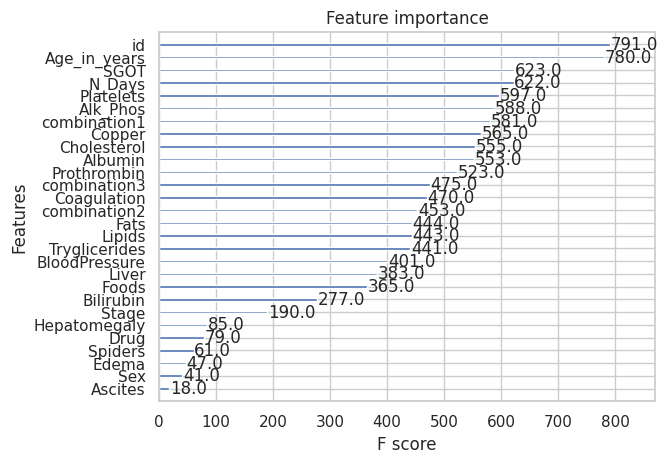

In [34]:
# there are a few features with zero contribution towards the model performance
xgb.plot_importance(model)
plt.show()


# HyperParameter Tuning

In [35]:
df_train.replace({'Status': {'C': 0, 'CL': 1, 'D': 2}}, inplace=True)

num_features =  df_train.select_dtypes(exclude='object').columns
num_features = [feature for feature in num_features if feature != 'Status' and feature != 'Stage']

preprocessor = ColumnTransformer(transformers = [
                            ('num', MinMaxScaler(), num_features),
                        ], remainder='passthrough')


In [36]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['id', 'N_Days', 'Drug', 'Sex', 'Ascites',
                                  'Hepatomegaly', 'Spiders', 'Edema',
                                  'Bilirubin', 'Cholesterol', 'Albumin',
                                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
                                  'Platelets', 'Prothrombin', 'Coagulation',
                                  'Lipids', 'Liver', 'BloodPressure', 'Fats',
                                  'Foods', 'Age_in_years', 'combination1',
                                  'combination2', 'combination3'])])

In [37]:
best_xgb_params = {
                     'colsample_bytree': 0.921406849537337,
                     'gamma': 0.11039967280901736,
                     'learning_rate': 0.09888205171122472,
                     'max_depth': 3,
                     'n_estimators': 164,
                     'reg_alpha': 0.006254562696477573,
                     'reg_lambda': 0.16936059228254785,
                     'subsample': 0.45539336635801275
                  }

xgb_pipeline = Pipeline([('preprocessor', preprocessor), 
                         ('xgb', XGBClassifier(objective='multi:softprob', **best_xgb_params))])

xgb_pipeline.fit(df_train.drop('Status', axis=1), df_train['Status'])



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['id', 'N_Days', 'Drug',
                                                   'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin', 'Coagulation',
                                                   'Lipids', 'Liver',
                                                   'BloodPressure', 'Fats',
                                                   'Foods', 'A...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.09888205171122472, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=164,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [38]:
y_proba = xgb_pipeline.predict_proba(df_test)

xgb_tune = submission = pd.DataFrame({'id': df_test['id'], 'Status_C': y_probs[:, 0], 'Status_CL': y_probs[:, 1], 'Status_D': y_probs[:, 2]})
xgb_tune.to_csv('xgb_tune.csv', index=False)



In [39]:
best_cat_params = {
     'bagging_temperature': 0.6508884729488529,
     'border_count': 84,
     'depth': 4,
     'iterations': 443,
     'l2_leaf_reg': 9.324426408004218,
     'learning_rate': 0.07370173320348283
}

cat_pipeline = Pipeline([('preprocessor', preprocessor), 
                         ('cat', CatBoostClassifier(**best_cat_params, verbose=500))])

cat_pipeline.fit(df_train.drop('Status', axis=1), df_train['Status'])



0:	learn: 1.0290927	total: 64.4ms	remaining: 28.5s
442:	learn: 0.3884760	total: 1.94s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['id', 'N_Days', 'Drug',
                                                   'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin', 'Coagulation',
                                                   'Lipids', 'Liver',
                                                   'BloodPressure', 'Fats',
                                                   'Foods', 'Age_in_years',
                                                   'combination1',
                                                   'combination2',
                                                   'combination3'])])),
                ('cat',
                 <catboost.core.CatBoostClassifier object at 0x7907b06339a0>)])

In [40]:
best_lgbm_params = {
     'colsample_bytree': 0.7546708263364187,
     'learning_rate': 0.23660842309529573,
     'max_depth': 8,
     'n_estimators': 153,
     'num_leaves': 23,
     'subsample': 0.7554563366576581
}

lgbm_pipeline = Pipeline([('preprocessor', preprocessor), 
                         ('cat', LGBMClassifier(**best_lgbm_params, objective='multiclass'))])

lgbm_pipeline.fit(df_train.drop('Status', axis=1), df_train['Status'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['id', 'N_Days', 'Drug',
                                                   'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin', 'Coagulation',
                                                   'Lipids', 'Liver',
                                                   'BloodPressure', 'Fats',
                                                   'Foods', 'Age_in_years',
                                                   'combination1',
                                                   'combination2',
                                                   'combination3'])])),
                ('cat',
                 LGBMClassifier(colsample_bytree=0.7546708263364187,
                                learning_rate=0.23660842309529573, max_depth=8,
                                n_estimators=153, num_leaves=23,
                                objective='multiclass',
                                subsample=0.7554563366576581))])

> # Voting & Staking 

In [41]:
voting_pipeline = VotingClassifier(estimators=
                             [
                                 ('xgb', xgb_pipeline),
                                 ('cat', cat_pipeline),
                                 ('lgbm', lgbm_pipeline)
                             ],voting='soft'
                         )
voting_pipeline


VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('num',
                                                                                MinMaxScaler(),
                                                                                ['id',
                                                                                 'N_Days',
                                                                                 'Drug',
                                                                                 'Sex',
                                                                                 'Ascites',
                                                                                 'Hepatomegaly',
                                                                                 'Spiders',
                                                                                 'Edema',
                                                                                 'Bilirubin',
                                                                                 'Cholesterol',
                                                                                 'Albumin',
                                                                                 'Copper',
                                                                                 'Alk_Phos',
                                                                                 'SGOT',
                                                                                 'Tryglicerides',
                                                                                 'Platelets',
                                                                                 'Prothrombin',
                                                                                 'Coagulation',
                                                                                 'Lipids',
                                                                                 'Live...
                                                                                 'Platelets',
                                                                                 'Prothrombin',
                                                                                 'Coagulation',
                                                                                 'Lipids',
                                                                                 'Liver',
                                                                                 'BloodPressure',
                                                                                 'Fats',
                                                                                 'Foods',
                                                                                 'Age_in_years',
                                                                                 'combination1',
                                                                                 'combination2',
                                                                                 'combination3'])])),
                                              ('cat',
                                               LGBMClassifier(colsample_bytree=0.7546708263364187,
                                                              learning_rate=0.23660842309529573,
                                                              max_depth=8,
                                                              n_estimators=153,
                                                              num_leaves=23,
                                                              objective='multiclass',
                                                              subsample=0.75

In [42]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Status', axis=1), df_train['Status'], test_size=0.25, random_state=42)

cross_val_logloss = -1 * cross_val_score(voting_pipeline, X_train, y_train, cv=stratified_kfold, scoring='neg_log_loss')

print("Cross-validation logloss:", cross_val_logloss)
print("Mean logloss:", cross_val_logloss.mean())

0:	learn: 1.0305679	total: 4.54ms	remaining: 2.01s
442:	learn: 0.3767139	total: 1.49s	remaining: 0us
0:	learn: 1.0284125	total: 4.58ms	remaining: 2.02s
442:	learn: 0.3747630	total: 1.49s	remaining: 0us
0:	learn: 1.0293760	total: 4.21ms	remaining: 1.86s
442:	learn: 0.3740933	total: 1.52s	remaining: 0us
0:	learn: 1.0312364	total: 4.28ms	remaining: 1.89s
442:	learn: 0.3738946	total: 1.48s	remaining: 0us
0:	learn: 1.0303055	total: 3.9ms	remaining: 1.73s
442:	learn: 0.3693270	total: 1.49s	remaining: 0us
0:	learn: 1.0294001	total: 4.19ms	remaining: 1.85s
442:	learn: 0.3729539	total: 1.49s	remaining: 0us
0:	learn: 1.0298633	total: 3.6ms	remaining: 1.59s
442:	learn: 0.3768132	total: 1.49s	remaining: 0us
0:	learn: 1.0305482	total: 3.78ms	remaining: 1.67s
442:	learn: 0.3694565	total: 1.5s	remaining: 0us
0:	learn: 1.0300673	total: 4.6ms	remaining: 2.03s
442:	learn: 0.3697080	total: 1.61s	remaining: 0us
0:	learn: 1.0299549	total: 4.15ms	remaining: 1.83s
442:	learn: 0.3723647	total: 1.51s	remaining

In [43]:
voting_pipeline.fit(df_train.drop('Status', axis=1), df_train['Status'])

y_proba = voting_pipeline.predict_proba(df_test)

voting = pd.DataFrame({'id': df_test['id'], 'Status_C': y_proba[:,0], 'Status_CL': y_proba[:,1], 'Status_D': y_proba[:,2]})
voting.to_csv('voting_model.csv', index=False)

0:	learn: 1.0290927	total: 6.7ms	remaining: 2.96s
442:	learn: 0.3884760	total: 1.83s	remaining: 0us


In [44]:


# Stacking didn't work well comparative to voting
stacking_pipeline = StackingClassifier(
    estimators=[
        ('catboost', cat_pipeline),
        ('lgbm', lgbm_pipeline),
        ('xgboost', xgb_pipeline)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    stack_method='auto',  
    cv=5  
)
stacking_pipeline



StackingClassifier(cv=5,
                   estimators=[('catboost',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('num',
                                                                                  MinMaxScaler(),
                                                                                  ['id',
                                                                                   'N_Days',
                                                                                   'Drug',
                                                                                   'Sex',
                                                                                   'Ascites',
                                                                                   'Hepatomegaly',
                                                                                   'Spiders',
                                                                                   'Edema',
                                                                                   'Bilirubin',
                                                                                   'Cholesterol',
                                                                                   'Albumin',
                                                                                   'Copper',
                                                                                   'Alk_Phos',
                                                                                   'SGOT',
                                                                                   'Tryglicerides',
                                                                                   'Platelets',
                                                                                   'Prothrombin',
                                                                                   'Coagulation',
                                                                                   'L...
                                                               learning_rate=0.09888205171122472,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=3,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=164,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob', ...))]))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [45]:
stacking_pipeline.fit(df_train.drop('Status', axis=1), df_train['Status'])

y_proba = stacking_pipeline.predict_proba(df_test)

stacking = pd.DataFrame({'id': df_test['id'], 'Status_C': y_proba[:,0], 'Status_CL': y_proba[:,1], 'Status_D': y_proba[:,2]})
stacking.to_csv('stacking_model.csv', index=False)

0:	learn: 1.0290927	total: 5.59ms	remaining: 2.47s
442:	learn: 0.3884760	total: 1.87s	remaining: 0us
0:	learn: 1.0285311	total: 4.41ms	remaining: 1.95s
442:	learn: 0.3720732	total: 1.69s	remaining: 0us
0:	learn: 1.0299310	total: 4.54ms	remaining: 2.01s
442:	learn: 0.3881584	total: 1.69s	remaining: 0us
0:	learn: 1.0292777	total: 4.3ms	remaining: 1.9s
442:	learn: 0.3816945	total: 1.66s	remaining: 0us
0:	learn: 1.0288410	total: 4.19ms	remaining: 1.85s
442:	learn: 0.3768982	total: 1.72s	remaining: 0us
0:	learn: 1.0297990	total: 4.21ms	remaining: 1.86s
442:	learn: 0.3846951	total: 1.64s	remaining: 0us


# Submission 

In [46]:
voting.to_csv("Submission.csv")